<a href="https://colab.research.google.com/github/lisabecker/nlp-fundamentals/blob/main/0303_naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Detecting Hate Speech on Twitter / X with Naive Bayes Classification
In a time where social media paltforms are flooded with diverse forms of communication, it's increasingly important to identify and mitigate hate speech to maintain healthy and respectful interactions. This notebook guides you through classification of tweets into one of three categories: "offensive language", "hate speech", or "neither". We'll utilize a Multinomial Naive Bayes algorithm, a powerful and efficient probabilistic machine learning model suited for text classification tasks.

## 1. Setting up the environment

In [1]:
!pip install --q datasets

##2. Load the Dataset
Here, we will load the dataset that contains the tweets and their corresponding labels from Hugging Face. This dataset is then converted into a Pandas DataFrame for ease of manipulation and analysis. The labels of the dataset are:
- 0: "offensive language"
- 1: "hate speech"
- 2: "neither"


In [2]:
from datasets import load_dataset

dataset = load_dataset("hate_speech_offensive", split="train")
classes = {0: "offensive language", 1: "hate speech", 2: "neither"}
print(f"Number of samples in the dataset: {len(dataset)}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Number of samples in the dataset: 24783


Let's check out what the dataset looks like

In [3]:
import pandas as pd

df = pd.DataFrame(dataset)
display(df.head())

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


##3. Preprocess Data
Text data often requires cleaning and formatting before it can be used for machine learning. This cell defines a preprocessing function to lower case the text, remove URLs, user mentions, hashtags, and punctuations. We then apply this preprocessing to our dataset.

In [4]:
import re, string
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    text = re.sub(r'\@\w+|\#','', text)
    # Remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

# Apply the preprocessing function to the text data
df['tweet'] = df['tweet'].apply(preprocess_text)
display(df.head())

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,rt as a woman you shouldnt complain about cl...
1,3,0,3,0,1,rt boy dats coldtyga dwn bad for cuffin dat ...
2,3,0,3,0,1,rt dawg rt you ever fuck a bitch and she st...
3,3,0,2,1,1,rt she look like a tranny
4,6,0,6,0,1,rt the shit you hear about me might be true ...


##4. Feature Extraction
Now we initialize and train the Multinomial Naive Bayes classifier using the training data. Naive Bayes is particularly suited for text classification tasks.


A Multinomial Naive Bayes classifier is a specific variant of the Naive Bayes classifier that is particularly suited for features that represent counts or frequency data. It operates under the assumption that features are multinomially distributed, making it ideal for text classification tasks where this distribution closely aligns with the frequency of words in the text.



In [5]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize a CountVectorizer or TfidfVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=1000)

# Fit and transform the text data
X = vectorizer.fit_transform(df['tweet'])

# Get the target variable
y = df['class']

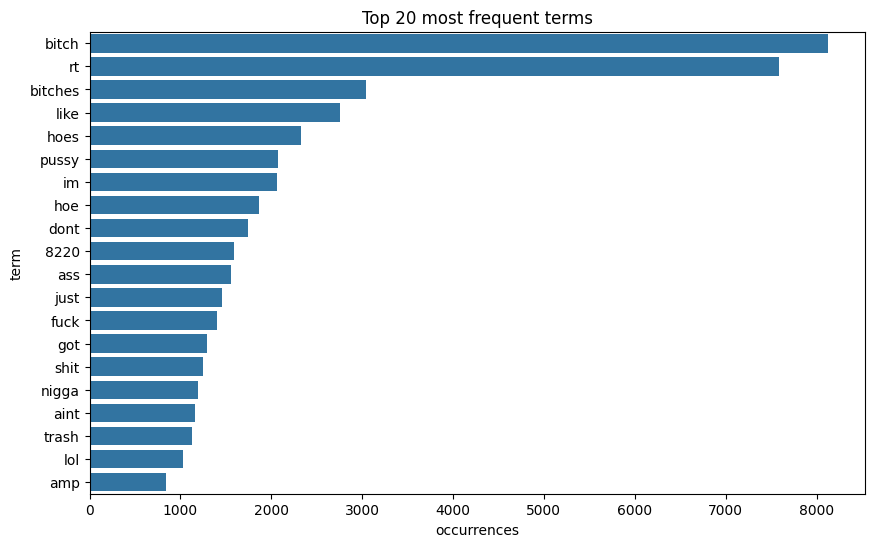

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sum up the counts of each term
word_counts = X.sum(axis=0).A1
word_freq = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'occurrences': word_counts})

# Sort by occurrences
top_words = word_freq.sort_values(by='occurrences', ascending=False).head(20)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='occurrences', y='term', data=top_words)
plt.title('Top 20 most frequent terms')
plt.show()

##5. Split the Data into Training and Test Sets
To evaluate our model, we need to split our dataset into training and testing sets. This cell uses `train_test_split` to divide the data, with 80% used for training and 20% reserved for testing.

In [7]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"There are {X_train.shape[0]} samples in the training set and {X_test.shape[0]} in the test set.")

There are 19826 samples in the training set and 4957 in the test set.


##6. Train the Naive Bayes Classifier
Now we initialize and train the Multinomial Naive Bayes classifier using the training data. Naive Bayes is particularly suited for text classification tasks.


In [8]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

MultinomialNB()

**What MultinomialNB.fit() does:**

**Learning from Data:** It takes X_train (your features, such as word counts or frequencies in text data) and y_train (the corresponding labels or classes for each training sample), and the classifier learns the relationship between them. For a Multinomial Naive Bayes classifier, this learning involves calculating the probabilities of feature occurrences conditional on the classes.

**Probability Calculation:** The algorithm calculates the likelihood of each feature given each class. For example, in a text classification task, this might mean calculating the probability of certain words appearing in documents of a particular class.

**Prior Probabilities:** It also computes the prior probabilities of each class, which are the probabilities of each class occurring in the dataset, regardless of the features.

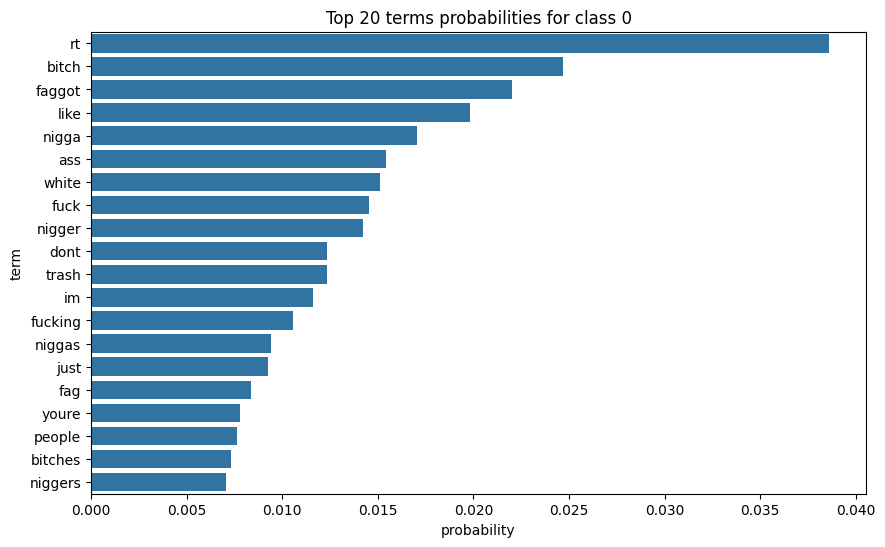

In [9]:
import numpy as np

# Extract feature probabilities
feature_probabilities = nb_classifier.feature_log_prob_

# For visualization, take the exponent to get back to probabilities
feature_probabilities = np.exp(feature_probabilities)

# Visualize probabilities for a specific class, e.g., class 0
class_0_probabilities = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'probability': feature_probabilities[0, :]})

# Sort and plot
class_0_top_words = class_0_probabilities.sort_values(by='probability', ascending=False).head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x='probability', y='term', data=class_0_top_words)
plt.title('Top 20 terms probabilities for class 0')
plt.show()

In [10]:
# Convert sparse matrix to array
X_test_array = X_test.toarray()

# Inverse transform to get the terms
X_test_terms = vectorizer.inverse_transform(X_test_array)

# Print first few samples
for i in range(5):  # Adjust the range as needed
    print(f"Sample {i+1}: {' '.join(X_test_terms[i])}")

Sample 1: bitch got yo
Sample 2: bad bitch fucking gone homie lil money need rt
Sample 3: aint good ho job know lol man nice right rt
Sample 4: faggot rt shit
Sample 5: bitch bitches cheat dont expect just niggas pay yall


##7. Evaluate the Classifier
After training, it's important to evaluate our classifier's performance. We use the test set to make predictions and then assess the accuracy and other metrics like precision, recall, and F1-score to understand how well our model is performing.


In [12]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions on the test set
predictions = nb_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

Accuracy: 0.8716965906798467

Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.24      0.31       290
           1       0.90      0.95      0.93      3832
           2       0.82      0.72      0.77       835

    accuracy                           0.87      4957
   macro avg       0.71      0.64      0.67      4957
weighted avg       0.86      0.87      0.86      4957



Let's test our classifier on individual samples:

In [11]:
sample = 0
tweet = {' '.join(X_test_terms[sample])}
prediction = nb_classifier.predict(X_test[sample])
print(f"The tweet {tweet} belongs to {classes[int(prediction)]} class.")

The tweet {'bitch got yo'} belongs to hate speech class.
